# Analítica de datos
# Examen parcial 1
# 2018-02
# NOMBRE APELLIDO, código

El dataset que deben analizar contiene los registros del histórico de las personas a las que se les ha otorgado un crédito financiero, indicando quienes pudieron pagarlo sin problemas y quienes no.

La idea es poder predecir, utilizando un modelo de aprendizaje supervisado (KNN) y las variables independientes disponibles qué aspirantes a un crédito tienen mas o menos riesgo de pagar.

Las variables de la hoja de datos son las siguientes:
- ID: El ID del cliente en el banco. Numérico, debe ser positivo y único.
- PudoPagar: Indica si el cliente ha podido pagar el crédito sin problemas (1) o no (0). Variable categórica binaria.
- Estudiante: Indica si el cliente es estudiante (Si) o no lo es (No). Variable categórica binaria.
- Ingresos: Indica la cantidad del crédito que aún adeuda el cliente. Deben ser valores numéricos positivos o nulos.
- Cuenta: Indica el dinero que tiene en la cuenta del banco. Deben ser valores numéricos.

## Entendimiento de los datos, limpieza

El archivo "creditos_examen.csv" contiene el dataset que tienen que analizar.
Se recomienda abrirlo primero en un lector de archivos planos para entender preliminarmente su formato y así poderlo cargar adecuadamente con Python.

Teniendo en cuenta el tipo de problema en cuestión (clasificación o regresión), realice un análisis exploratorio de los datos estableciendo el baseline, verificando la calidad de los datos (tipos de las variables, valores inválidos, excepciones, valores faltantes, etc.), utilizando gráficos para poder entender las distribuciones de los datos e identificar posibles problemas.

#### Puntos a desarrollar

- Carguen el archivo en memoria y exploren los datos, tratando de identificar problemas e inconsistencias teniendo en cuenta el diccionario de datos y el contexto del problema. (0.7)

- Obtengan el modelo de referencia (Baseline) y calculen sus métricas de evaluación. (0.3)

- Limpien los datos arreglando los problemas, eliminando columnas, eliminando registros, o ignorándolos, justificando sus decisiones. 
Una vez resueltos los problemas encontrados, indique la siguiente información: ID del registro, Tipo de ProblemaResolución. (1.2)

## Modelamiento con K-NN

#### Puntos a desarrollar:

- Escogiendo un valor de los parámetros al azar, construyan un modelo K-NN inicial sobre los datos limpios y calcule las métricas de accuracy, error, kappa, precision, recall, especifidad, y F-measure. Analice la calidad del modelo interpretando las métricas (1.0).

- Teniendo en cuenta las métricas más adecuadas para el problema, y siguiendo un protocolo de evaluación adecuado, establezca el mejor valor de los parámetros del modelo. (1.5)

- ¿El valor de los parámetros inicialmente escogido estaba en una situación de overfitting o de underfitting? Explique su respuesta. (0.5)

# Desarrollo de los puntos

In [1]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import KFold, cross_val_score #protocolo de evaluación
from sklearn import neighbors, datasets, metrics
from sklearn import preprocessing 
import seaborn as sns

...

...

In [111]:
data = pd.read_csv('titanic.csv', index_col=0, sep=",")
data.head(10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [95]:
data.describe(include="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Widegren, Mr. Carl/Charles Peter",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [96]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [97]:
data.Survived = data.Survived.astype(str)

In [98]:
data.dtypes

Survived     object
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [99]:
data.Pclass = data.Pclass.astype(str)

## Baseline

#### CONTEO

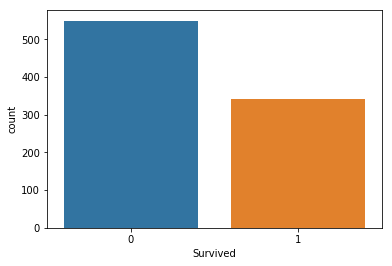

In [100]:
ax = sns.countplot(x="Survived", data=data)

In [242]:
data.Survived[data.Survi=="0"].aggregate('count')

529

In [243]:
data[data.PudoPagar=="0"].aggregate('mean')

Survived     0.000000
Pclass       2.567108
Age         30.397921
SibSp        0.567108
Parch        0.325142
Fare        20.242712
dtype: float64

In [244]:
data.shape[0]

854

In [245]:
data.Survived[data.Survived=="0"].aggregate('count') / data.shape[0] * 100%

SyntaxError: invalid syntax (<ipython-input-245-e0207d2d8c01>, line 1)

# Baseline del Modelo es: <font color='orange'> 61,61% </font>
Hay un 61,61% de posibilidades de que un pasajero muera en el titanic

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null object
Pclass      891 non-null object
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 123.5+ KB


In [112]:
data = data.drop(["Cabin"], axis=1)

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
Survived    891 non-null object
Pclass      891 non-null object
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 116.6+ KB


In [113]:
data = data.drop(["Ticket"], axis=1)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
Survived    891 non-null object
Pclass      891 non-null object
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 109.6+ KB


In [115]:
data.Age[data.Age.isna()] = 30

C:\Users\Santiago\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [117]:
data[data.Embarked.isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In [118]:
data = data.dropna()

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 9 columns):
Survived    889 non-null object
Pclass      889 non-null object
Name        889 non-null object
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 69.5+ KB


In [119]:
data.head(30)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
6,0,3,"Moran, Mr. James",male,30.0,0,0,8.4583,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Name        889 non-null object
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [121]:
data = data.drop(["Name"], axis=1)

In [122]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [141]:
data.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,874.000000,874.000000,874,874.000000,874.000000,874.000000,874.000000,874
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,562,NaN,NaN,NaN,NaN,629
mean,0.387872,2.318078,NaN,29.669336,0.533181,0.389016,32.647539,NaN
std,0.487544,0.834243,NaN,13.039852,1.110987,0.812090,49.942710,NaN
min,0.000000,1.000000,NaN,1.000000,0.000000,0.000000,4.012500,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.925000,NaN
50%,0.000000,3.000000,NaN,30.000000,0.000000,0.000000,14.500000,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.275000,NaN


In [130]:
data[data.Age <1].head(100)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
79,1,2,male,0.83,0,2,29.0000,S
306,1,1,male,0.92,1,2,151.5500,S
470,1,3,female,0.75,2,1,19.2583,C
645,1,3,female,0.75,2,1,19.2583,C
756,1,2,male,0.67,1,1,14.5000,S
804,1,3,male,0.42,0,1,8.5167,C
832,1,2,male,0.83,1,1,18.7500,S


In [131]:
data.Age[data.Age < 1] = 1

C:\Users\Santiago\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [139]:
data[data.Fare <1]
data = data[data.Fare != 0]

In [135]:
15/898

0.01670378619153675

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 1 to 891
Data columns (total 8 columns):
Survived    874 non-null int64
Pclass      874 non-null int64
Sex         874 non-null object
Age         874 non-null float64
SibSp       874 non-null int64
Parch       874 non-null int64
Fare        874 non-null float64
Embarked    874 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 61.5+ KB


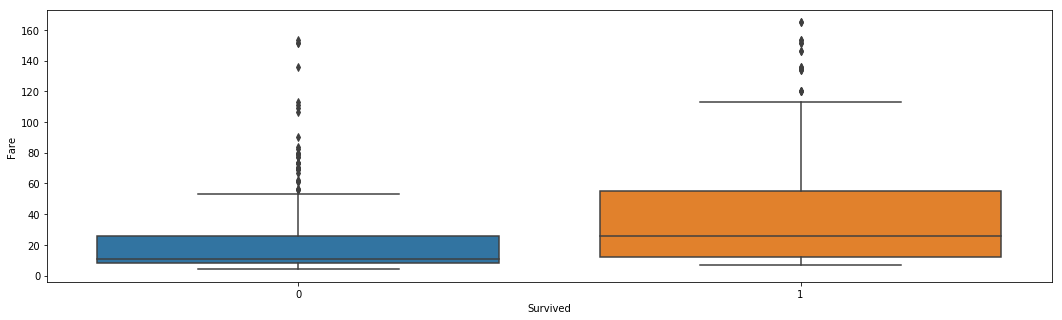

In [155]:
plt.figure(figsize=(18,5))
sns.boxplot(x="Survived", y="Fare", data=data)

In [152]:
data[data.Fare >200].head(100)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
28,0,1,male,19.0,3,2,263.0000,S
89,1,1,female,23.0,3,2,263.0000,S
119,0,1,male,24.0,0,1,247.5208,C
300,1,1,female,50.0,0,1,247.5208,C
312,1,1,female,18.0,2,2,262.3750,C
342,1,1,female,24.0,3,2,263.0000,S
378,0,1,male,27.0,0,2,211.5000,C
381,1,1,female,42.0,0,0,227.5250,C
439,0,1,male,64.0,1,4,263.0000,S


In [154]:
data = data[data.Fare < 200]

In [156]:
data.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,854.000000,854.000000,854,854.000000,854.000000,854.000000,854.000000,854
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,554,NaN,NaN,NaN,NaN,621
mean,0.380562,2.348946,NaN,29.637002,0.528103,0.373536,26.870935,NaN
std,0.485810,0.818896,NaN,13.063151,1.109918,0.798476,29.316622,NaN
min,0.000000,1.000000,NaN,1.000000,0.000000,0.000000,4.012500,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.925000,NaN
50%,0.000000,3.000000,NaN,30.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,30.000000,NaN


# KNN

In [163]:
import warnings
warnings.filterwarnings("ignore")

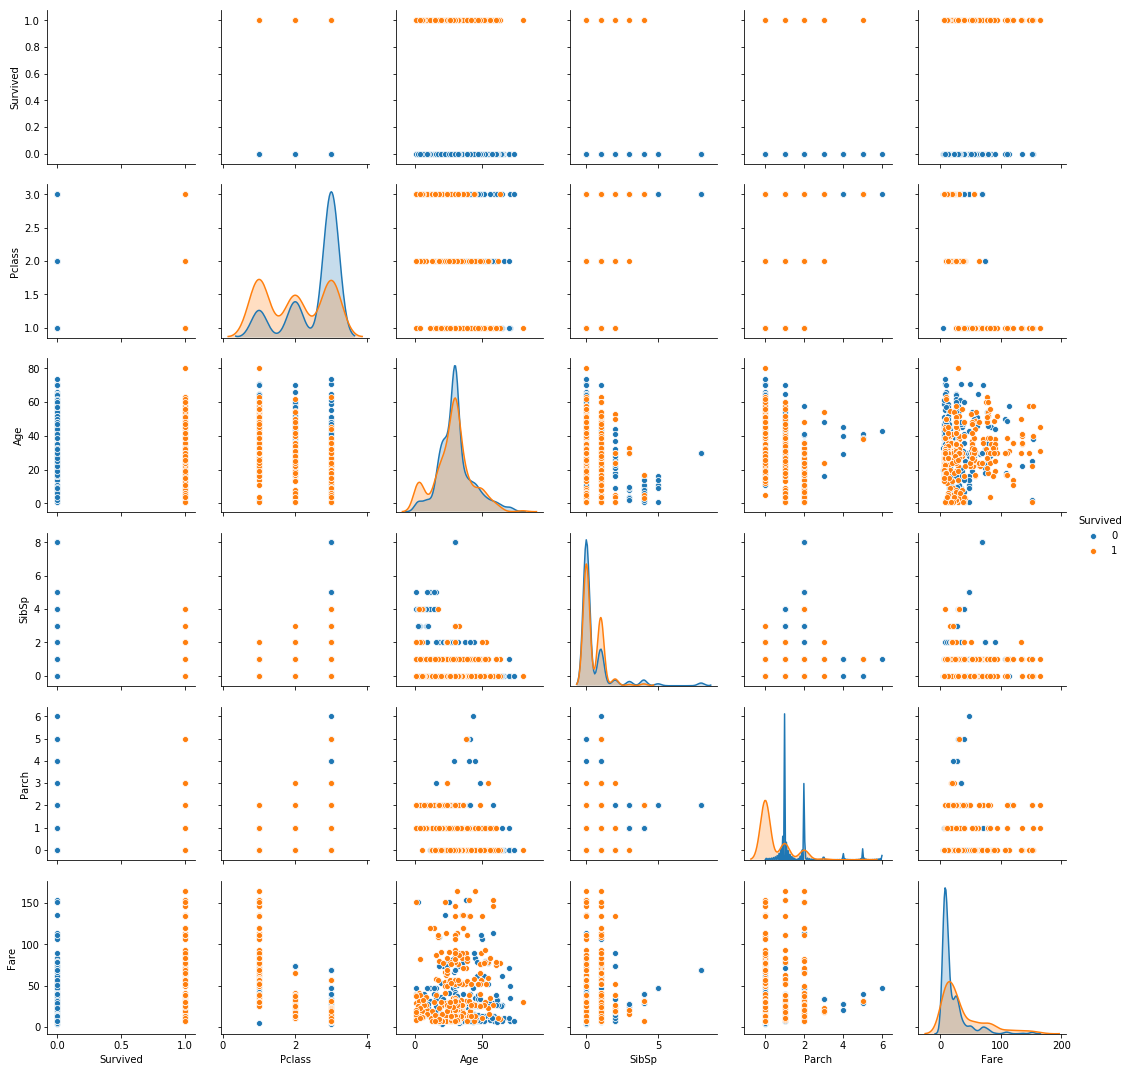

<Figure size 1296x1296 with 0 Axes>

In [164]:
sns.pairplot(data, hue="Survived")
plt.figure(figsize=(18,18))
plt.tight_layout()

In [200]:
X = data.loc[:,['Age', 'SibSp', 'Parch', 'Fare']]
print(X.shape)
X.head()

(854, 4)


,Age,SibSp,Parch,Fare
PassengerId,,,,
1,22.0,1,0,7.2500
2,38.0,1,0,71.2833
3,26.0,0,0,7.9250
4,35.0,1,0,53.1000
5,35.0,0,0,8.0500


In [201]:
y = data.loc[:,['Survived']]
print(y.shape)
y.head()

(854, 1)


,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345, stratify=y)

In [203]:
# Crear un normalizador Min-Max
# Necesitamos normalizar los datos para que variables no opaque otras
min_max_scaler = preprocessing.MinMaxScaler()

# Aprender sus parámetros con el set de entrenamiento y transformar los dos datasets
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [204]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [170]:
y_train

PassengerId
79     1
222    0
305    0
120    0
874    0
757    0
345    0
856    1
658    0
41     0
708    1
553    0
759    0
374    0
778    1
227    1
275    1
369    1
236    0
4      1
389    0
516    0
56     1
150    0
667    0
775    1
655    0
44     1
211    0
691    1
      ..
846    0
165    0
799    0
628    1
736    0
854    1
513    1
828    1
59     1
427    1
359    1
451    0
344    0
506    0
530    0
231    1
266    0
471    0
684    0
308    1
734    0
746    0
464    0
350    0
401    1
5      0
91     0
282    0
565    0
450    1
Name: Survived, Length: 597, dtype: int64

In [207]:
# Crea los vectores para la grafica y para el almacemiento de los resultados del modelo

# Define Vectores de Accuracy
acc_train_vec=[]
acc_test_vec=[]

# Define Vectores de Kappa
kappa_train_vec=[]
kappa_test_vec=[]

# Definimos la cantidad de K que van a haber en el Modelo
k_vec= np.arange(1,201,2)

# Correr el Modelo
for k in k_vec:
    # Crea Modelo KNN
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    # Aplica Modelo al conjunto de Entrenamiento
    knn.fit(X_train_scaled, y_train)
    
    # Predecir la variable Y según el modelo en el conjunto de Entramiento
    y_pred = knn.predict(X_train_scaled)
    
    # Agrega los resultados en los vectores de entrenamiento
    acc_train_vec.append(metrics.accuracy_score(y_train, y_pred))
    kappa_train_vec.append(metrics.cohen_kappa_score(y_train, y_pred))
    
    # Predecir la variable Y según el modelo en el conjunto de Test
    y_pred = knn.predict(X_test_scaled)
    
    # Agrega los resultados en los vectores de Test
    acc_test_vec.append(metrics.accuracy_score(y_test, y_pred))
    kappa_test_vec.append(metrics.cohen_kappa_score(y_test, y_pred))

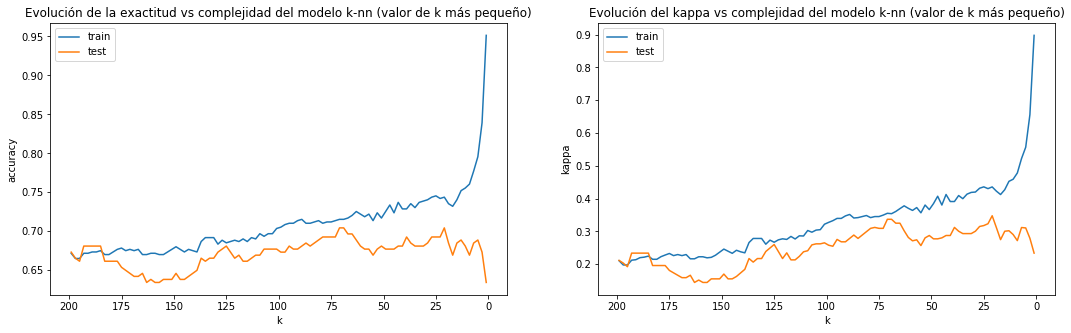

In [208]:
fig = plt.figure(figsize=(18,5))

fig.add_subplot(1, 2, 1)
ax = plt.gca() # get current axis
plt.plot(k_vec, acc_train_vec)
plt.plot(k_vec, acc_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Evolución de la exactitud vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

fig.add_subplot(1, 2, 2)
ax = plt.gca() # get current axis
plt.plot(k_vec, kappa_train_vec)
plt.plot(k_vec, kappa_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('kappa')
plt.title('Evolución del kappa vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

In [209]:
k_optimo = k_vec[np.argmax(acc_test_vec)]
acc_optima= max(acc_test_vec)
print("El óptimo se obtiene con K=%d, que produce un %.2f%% de exactitud" %(k_optimo, 100*acc_optima))

k_optimo = k_vec[np.argmax(kappa_test_vec)]
kappa_optima= max(kappa_test_vec)
print("El óptimo se obtiene con K=%d, que produce un %.2f%% de kappa" %(k_optimo, 100*kappa_optima))

El óptimo se obtiene con K=21, que produce un 70.43% de exactitud
El óptimo se obtiene con K=21, que produce un 34.77% de kappa


In [210]:
# Lo Aprendido se aplica en el conjunto de Prueba
knn = neighbors.KNeighborsClassifier(n_neighbors=k_optimo)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
acc_test_vec.append(metrics.accuracy_score(y_test, y_pred))

In [211]:
print("Exactitud : ", metrics.accuracy_score(y_test, y_pred))
print("Kappa     : ", metrics.cohen_kappa_score(y_test, y_pred))
print("Precisión : ", metrics.precision_score(y_test, y_pred))
print("Recall    : ", metrics.recall_score(y_test, y_pred))

Exactitud :  0.7042801556420234
Kappa     :  0.34771573604060924
Precisión :  0.6410256410256411
Recall    :  0.5102040816326531


# Cross-Validation KNN

In [231]:
# Crear un normalizador Min-Max
min_max_scaler = preprocessing.MinMaxScaler()

# Aprender sus parámetros con el set de entrenamiento y transformar los dos datasets
X_scaled = min_max_scaler.fit_transform(X)

#crea Vector de Recall
rec_mean_vec=[]

# Definimos la cantidad de K que van a haber en el Modelo
k_vec= np.arange(1,51,2)

# Correr el Modelo
for k in k_vec:
    
    # Crea Modelo KNN
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    rec_vec_fold = cross_val_score(knn, X_scaled, np.squeeze(y), cv=10, scoring='recall')
    rec_mean_vec.append(rec_vec_fold.mean())
    

#print(acc_mean_vec)
#print(k_vec)

Text(0.5, 1.0, 'Evolución de le exactitud vs complejidad del modelo k-nn (valor de k más pequeño)')

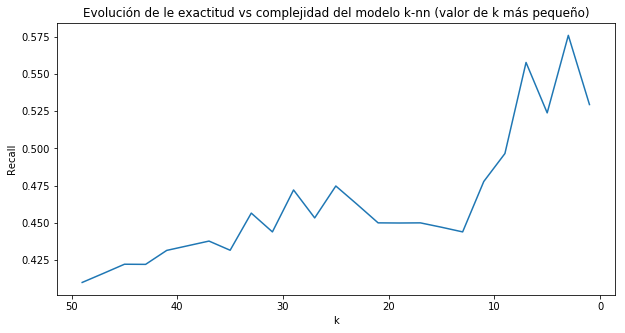

In [232]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, rec_mean_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('Recall')
plt.title('Evolución de le exactitud vs complejidad del modelo k-nn (valor de k más pequeño)')

In [233]:
k_optimo = k_vec[np.argmax(rec_mean_vec)]
rec_optima= max(rec_mean_vec)
print("El óptimo se obtiene con K=%d, que produce un %.1f%% de Recall" %(k_optimo, 100*rec_optima))

El óptimo se obtiene con K=3, que produce un 57.6% de Recall
